<b>Q1. Classify the iris dataset using a decision tree classifier. Divide the dataset into training and
testing in the ratio 80:20. Use the functions from the sklearn package. Display the final decision
tre<b/>e.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


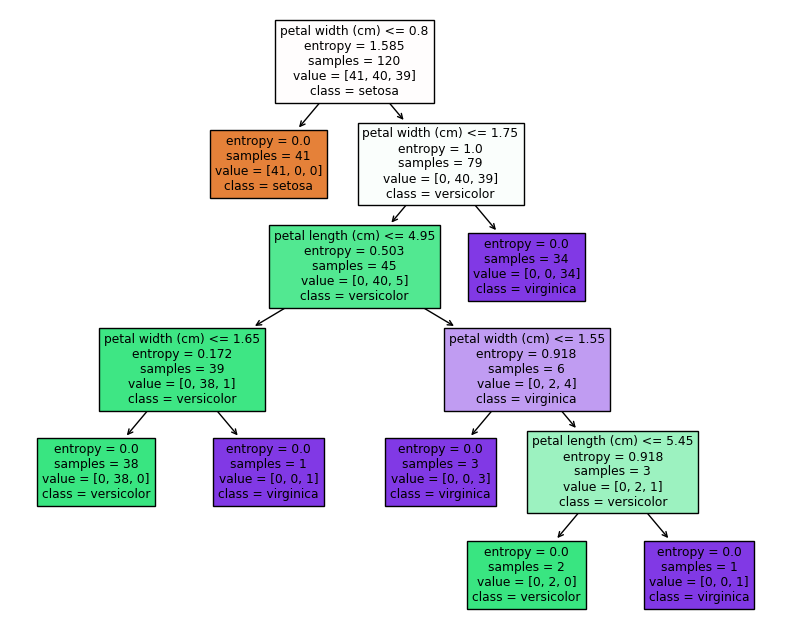

Accuracy: 0.9666666666666667


In [31]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

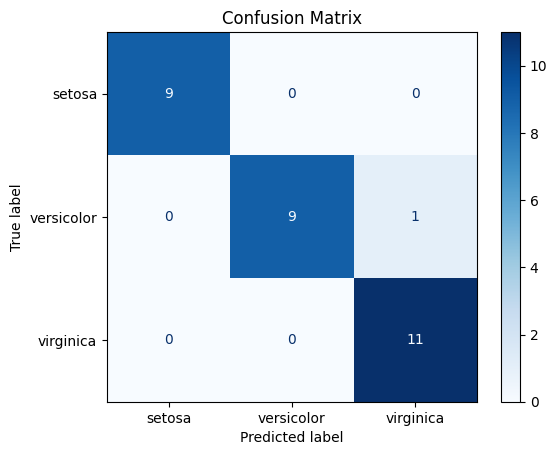

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

<b>Q2.Classify the iris dataset using a Bayes classifier. Divide the dataset into training and testing in
the ratio 80:20. Use the functions from the sklearn package. Assume the data follows a
gaussian distribution. Display the training and testing accuracy, confusion matri<b/>x.

Training Accuracy: 0.9416666666666667
Testing Accuracy: 0.9666666666666667


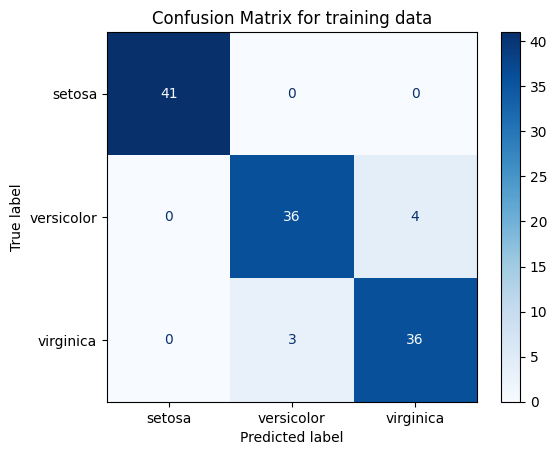

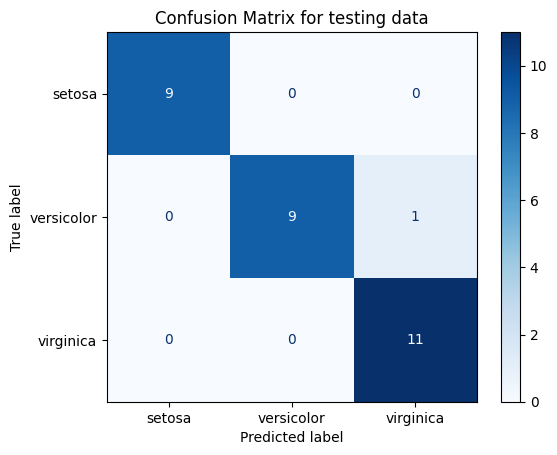

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for training data')
plt.show()

cm1 = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for testing data')
plt.show()


<b>Q3.Classify the iris dataset using the KNN classifier. Divide the dataset into training, validation, and
testing in the ratio 70:15:15. Use the functions from the sklearn package. Find the best value
for k. Normalize the dataset before applying the model. Display the training, validation, and
testing accuracy, confusion matr<b>ix.

Best k is:  1
Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 0.9130434782608695


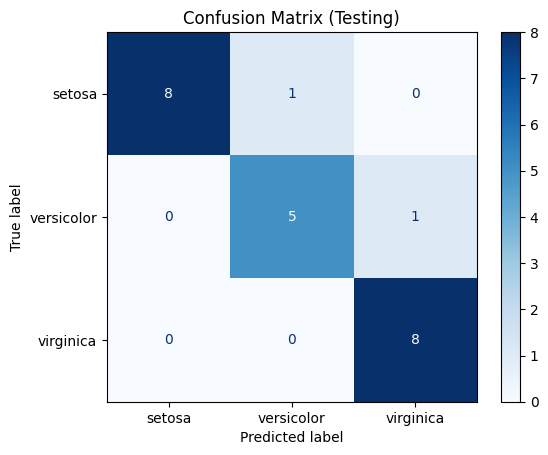

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = iris.data
y = iris.target

# Normalization 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.15, random_state=55)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=55)  # 0.15 / (0.85) = 0.176

best_accuracy = 0
best_k = 1

for k in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_k = k

print("Best k is: ",best_k)

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_val, y_train_val)

y_train_pred = final_knn.predict(X_train_val)
y_val_pred = final_knn.predict(X_val)
y_test_pred = final_knn.predict(X_test)

train_accuracy = accuracy_score(y_train_val, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Testing)')
plt.show()


<b>Q4.Create a linear regression model using ordinary least squares estimation. Find the best fit line
for the dataset ‘salary.csv’ using the above model. Display the training and testing dataset in the
scatter plot and draw the best fit line in the same. Also find the MSE and R2 for the testing
datas<b/>et.

In [53]:
df = pd.read_csv('salary.csv')
df

,Years,Salary
0,0.0,15
1,1.0,25
2,1.5,27
3,2.0,33
4,2.5,38
5,3.0,45
6,3.5,47
7,4.0,55
8,4.5,58
9,5.0,63


In [69]:
mean_years = round(df['Years'].mean(),1)
mean_salary = df['Salary'].mean()
mean_years,mean_salary

(4.5, 56.2)

In [92]:
data = pd.read_csv('salary.csv')

years = data['Years'].values
salary = data['Salary'].values

mean_years = round(years.mean(), 2)
mean_salary = round(salary.mean(), 1)

squared_diff_years = (years - mean_years) ** 2
product_diff = (years - mean_years) * (salary - mean_salary)

df = pd.DataFrame({
    'Years': years,
    'Salary': salary,
    'Years-Mean': years - mean_years,
    'Salary-Mean': salary - mean_salary,
    '(Years-Mean)*(Salary-Mean)': product_diff,
    '(Years-Mean)^2': squared_diff_years
})


sums = np.round(df.sum(),2)

print("DataFrame:")
print(df)
print("\nRounded Sums:")
print(sums)


DataFrame:
    Years  Salary  Years-Mean  Salary-Mean  (Years-Mean)*(Salary-Mean)  \
0     0.0      15       -4.47        -41.2                     184.164   
1     1.0      25       -3.47        -31.2                     108.264   
2     1.5      27       -2.97        -29.2                      86.724   
3     2.0      33       -2.47        -23.2                      57.304   
4     2.5      38       -1.97        -18.2                      35.854   
5     3.0      45       -1.47        -11.2                      16.464   
6     3.5      47       -0.97         -9.2                       8.924   
7     4.0      55       -0.47         -1.2                       0.564   
8     4.5      58        0.03          1.8                       0.054   
9     5.0      63        0.53          6.8                       3.604   
10    6.0      70        1.53         13.8                      21.114   
11    7.0      77        2.53         20.8                      52.624   
12    8.0      85        3.

* s = a + b*y
where s is salary , a is intercept and b is slope , y is years

In [96]:
b = (sums['(Years-Mean)*(Salary-Mean)'])/ sums['(Years-Mean)^2']
b

9.079144638207211

In [114]:
a = mean_salary - b * mean_years
a

15.616223467213771

Now making a function to do everything

In [149]:
df1 = pd.read_csv('Salary_Data.csv')
x= df1['Years of Experience']
y=df1['Salary']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_train

344     4.0
186     6.0
27      1.0
291     2.0
73      2.0
       ... 
203     1.5
255    14.0
72     16.0
235     3.0
37     14.0
Name: Years of Experience, Length: 299, dtype: float64

In [150]:
class OLS:
    x_mean = 0
    y_mean = 0
    a = 0
    b = 0
    
    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        x_minus_x_mean = x_train - x_mean
        y_minus_y_mean = y_train - y_mean
        
        prod = x_minus_x_mean*y_minus_y_mean
        prod_sum = np.sum(prod)
        
        x_minus_x_mean_WS = np.square(x_minus_x_mean)
        
        x_minus_x_mean_WS_sum = np.sum(x_minus_x_mean_WS)
        
        self.b = prod_sum/x_minus_x_mean_WS_sum
        self.a = y_mean - (self.b*x_mean)
        
        return self.b, self.a
    
    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            y_pred.append(self.a + (self.b*i))
        return np.array(y_pred)

In [156]:
model = OLS()
coeff = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
coeff

(6720.23737960371, 33339.59850226411)

In [153]:
from sklearn.metrics import mean_squared_error
a = mean_squared_error(y_test, y_pred)
a

242931056.39934912

In [154]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9038778296341599

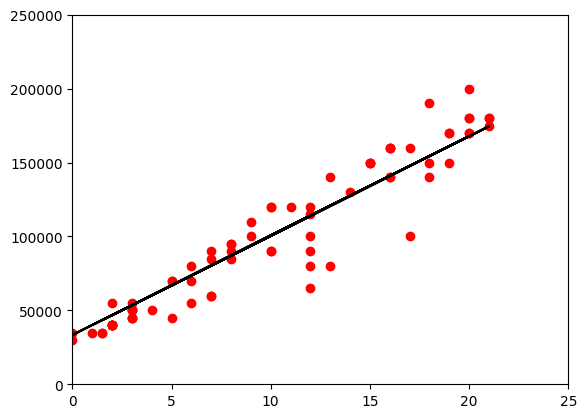

In [155]:
plt.plot(x_test, y_pred, c='black')
plt.scatter(x_test, y_test, c='red')
plt.xlim(0.0, 25.0)
plt.ylim(0.0, 250000.0)
plt.show()


<b>Q5. Consider the dataset california_housing from sklearn . Find the correlation b/w the different
attributes of this dataset. Using the least square estimation method from sklearn, find the best fit
line. Also find the error<b/>

In [160]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y

correlation_matrix = df.corr()
print(correlation_matrix)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("\nBest fit line coefficients using least squares estimation:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("\nMean Squared Error:", mse)


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

<b>Q6.Consider the dataset ‘Adveristing.csv’. Find the correlation coefficient between the input
attributes TV, Radio, Newspaper and Output Attribute Sales. Use least square estimation
method to find the line of regression b/w
1. TV and Sales
2. Radio and Sales
3. Newspaper and Sales
For all of the above options, also draw a scatter plot and line of regression. Also find the error in
each of the above.<b/>

In [172]:
df1 = pd.read_csv('Advertising.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [173]:
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


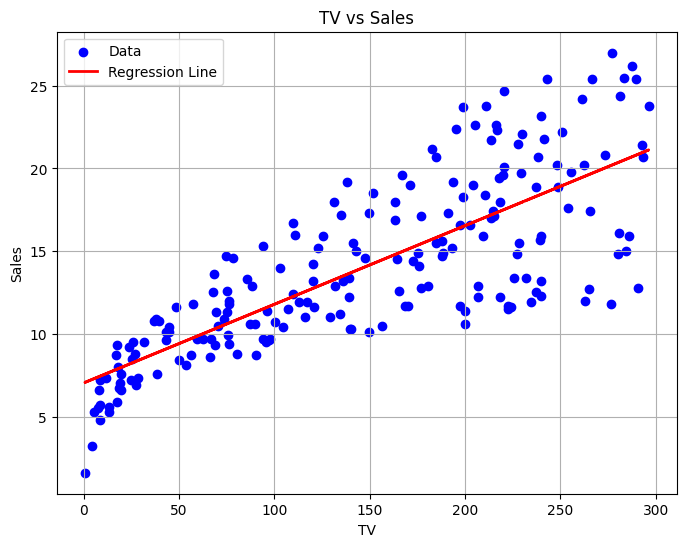

Mean Squared Error for TV: 10.512652915656757


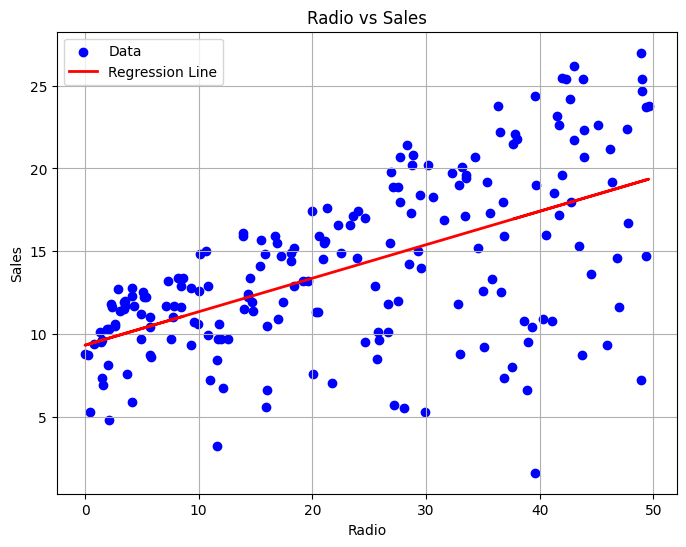

Mean Squared Error for Radio: 18.09239774512544


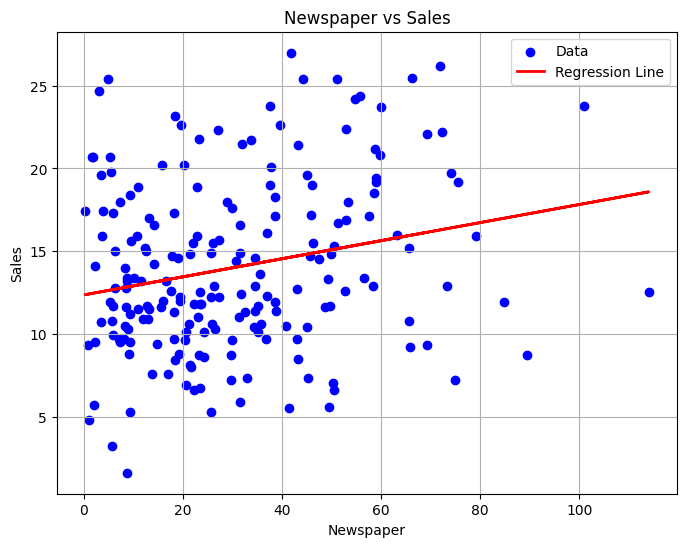

Mean Squared Error for Newspaper: 25.6740227205597


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Advertising.csv')

# Define a function for linear regression using least squares method
def least_squares_regression(X, y):
    X = np.column_stack((np.ones_like(X), X))  # Add intercept term
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

# Function to calculate mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# For each input attribute, perform linear regression and plot scatter plot with regression line
input_attributes = ['TV', 'Radio', 'Newspaper']
output_attribute = 'Sales'

for attribute in input_attributes:
    # Extract attribute and target variable
    X = data[attribute].values.reshape(-1, 1)
    y = data[output_attribute].values.reshape(-1, 1)

    # Perform linear regression
    beta = least_squares_regression(X, y)

    # Calculate predicted values
    y_pred = np.dot(np.column_stack((np.ones_like(X), X)), beta)

    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)

    # Plot scatter plot and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'{attribute} vs {output_attribute}')
    plt.xlabel(attribute)
    plt.ylabel(output_attribute)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Mean Squared Error for {attribute}: {mse}")


Mean Squared Error for TV: 10.512652915656757
7.032593549127695 [0.04753664]


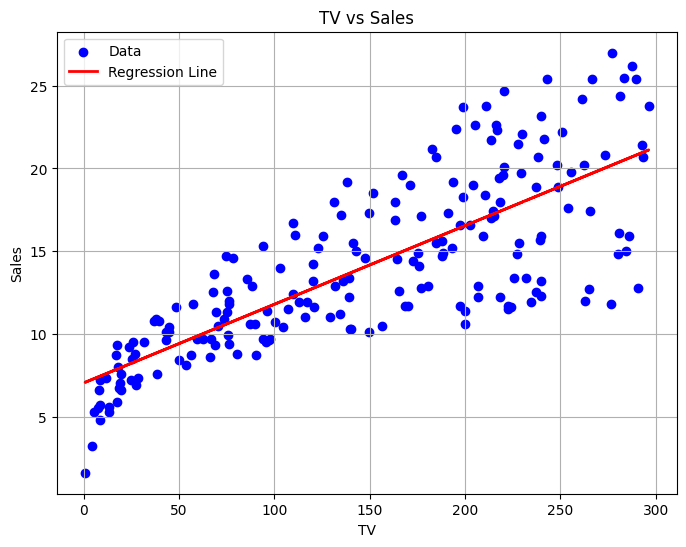

Mean Squared Error for Radio: 18.09239774512544
9.311638095158283 [0.20249578]


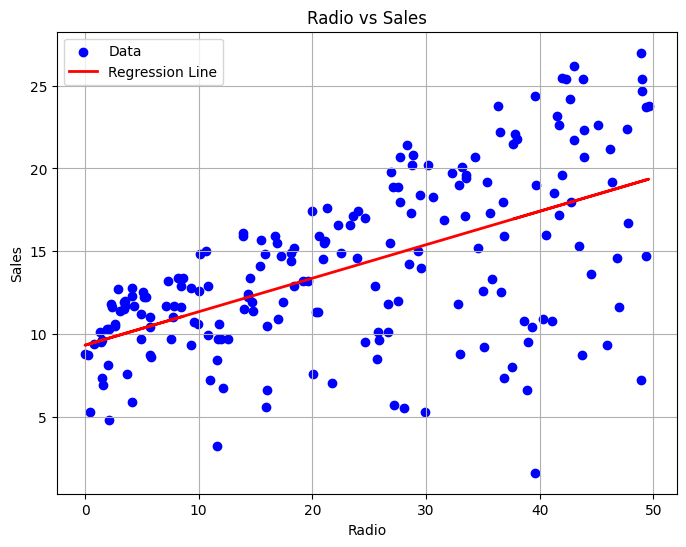

Mean Squared Error for Newspaper: 25.674022720559698
12.35140706927816 [0.0546931]


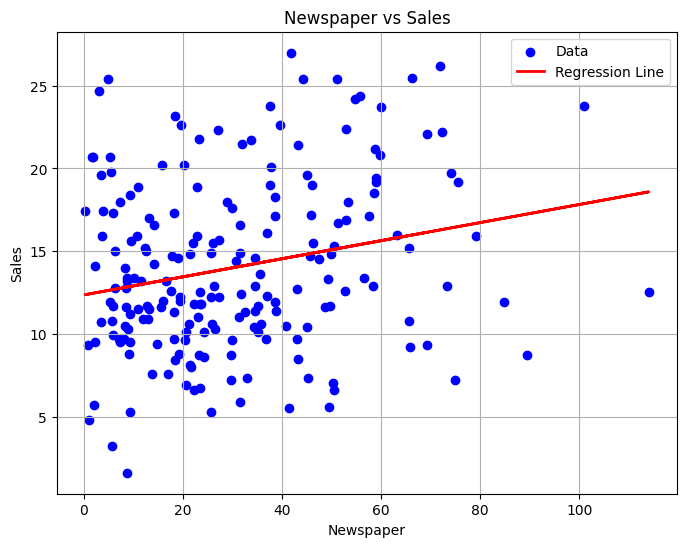

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
data = pd.read_csv('Advertising.csv')

# Step 2: Calculate correlation coefficients
data.corr()

# Step 3-5: Perform linear regression for each input-output pair and calculate error
for feature in ['TV', 'Radio', 'Newspaper']:
    # Extract features (X) and target variable (y)
    X = data[feature].values.reshape(-1, 1)
    y = data['Sales'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict on the same data for visualization
    y_pred = model.predict(X)

    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)

    # Print correlation coefficient and mean squared error
    print(f"Mean Squared Error for {feature}:", mse)
    print(model.intercept_, model.coef_)
    # Plot scatter plot and line of regression
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'{feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


<b>Q7.Consider the dataset ‘Adveristing.csv’. Find the best fit regression line between the input
attributes TV, Radio, Newspaper and Output Attribute Sales using gradient descent method.
Also find R2 .<b/>

In [201]:
class GradientDescent:
    def __init__(self, learning_rate=0.0001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit(self, X, y):
        m = len(y)
        X = np.column_stack((np.ones_like(X[:, 0]), X))  # Add intercept term
        n = X.shape[1]
        self.coefficients = np.zeros((n, 1))  # Initialize coefficients to zeros

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.coefficients)
            error = y_pred - y
            gradient = np.dot(X.T, error) / m
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        X = np.column_stack((np.ones_like(X[:, 0]), X))  # Add intercept term
        return np.dot(X, self.coefficients)
    def line(self):
        return self.coefficients
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

# Load the dataset
data = pd.read_csv('Advertising.csv')
data_scaled = scaler.fit_transform(data[['TV']])

# Extract input attributes (TV, Radio, Newspaper) and output attribute (Sales)
X = data_scaled
y = data['Sales'].values.reshape(-1, 1)

# Initialize and fit the GradientDescentOLS model
model = GradientDescent()
model.fit(X, y)
l = model.line()
print(l)
# Calculate R-squared value
r2 = model.r_squared(X, y)

print("R-squared value:", r2)


[[1.31580939]
 [0.76582762]]
R-squared value: -5.545908277878926


In [182]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [183]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [196]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data[['TV']])
data_scaled

array([[0.77578627],
       [0.1481231 ],
       [0.0557998 ],
       [0.50997633],
       [0.60906324],
       [0.02705445],
       [0.19208657],
       [0.4041258 ],
       [0.02671627],
       [0.67331755],
       [0.2211701 ],
       [0.72370646],
       [0.07811972],
       [0.32735881],
       [0.68785932],
       [0.65843761],
       [0.22691917],
       [0.94927291],
       [0.2316537 ],
       [0.49577274],
       [0.73621914],
       [0.80047345],
       [0.04227257],
       [0.76969902],
       [0.20831924],
       [0.8867095 ],
       [0.4808928 ],
       [0.80960433],
       [0.83902604],
       [0.23638823],
       [0.98816368],
       [0.37943862],
       [0.32634427],
       [0.89584038],
       [0.32127156],
       [0.98072371],
       [0.90023673],
       [0.25025364],
       [0.14338857],
       [0.76868448],
       [0.68244843],
       [0.59621238],
       [0.99053094],
       [0.69732837],
       [0.08251606],
       [0.58978695],
       [0.30098072],
       [0.808

In [199]:
model = OLS()
coeff = model.fit(X, y)
y_pred = model.predict(X)
coeff

(-7.889285306022946e-17, 14.022500000000003)

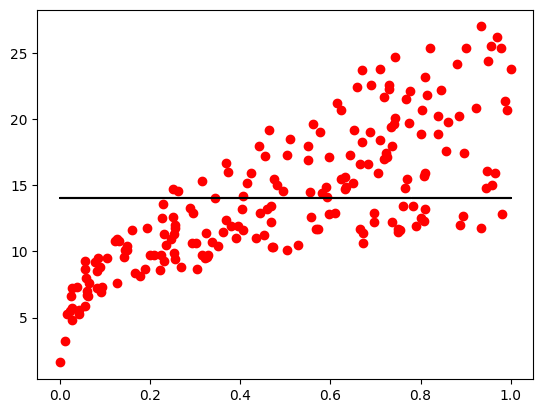

In [202]:
plt.plot(X, y_pred, c='black')
plt.scatter(X, y, c='red')
# plt.xlim(0.0, 25.0)
# plt.ylim(0.0, 250000.0)
plt.show()

<b>Q8. Use logistic regression to build a model to classify the breast cancer dataset Divide the dataset
into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For
each iteration of training, store the training and testing accuracy. Plot a graph showing training
and testing accuracy Vs iteration no. Do not use sklearn logistic function.<b/>

In [220]:
data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
data_scaled = scaler.fit_transform(X)
X=data_scaled

Epoch 0: Cost = 0.6931471805599452, Training Accuracy = 0.8366834170854272, Testing Accuracy = 0.8888888888888888
Epoch 100: Cost = 0.5960995029146938, Training Accuracy = 0.8492462311557789, Testing Accuracy = 0.8830409356725146
Epoch 200: Cost = 0.5347172727965057, Training Accuracy = 0.864321608040201, Testing Accuracy = 0.8947368421052632
Epoch 300: Cost = 0.4926858008542267, Training Accuracy = 0.8668341708542714, Testing Accuracy = 0.9005847953216374
Epoch 400: Cost = 0.4619181679082745, Training Accuracy = 0.864321608040201, Testing Accuracy = 0.9005847953216374
Epoch 500: Cost = 0.4382155125676517, Training Accuracy = 0.864321608040201, Testing Accuracy = 0.9064327485380117
Epoch 600: Cost = 0.4192315642054818, Training Accuracy = 0.871859296482412, Testing Accuracy = 0.9005847953216374
Epoch 700: Cost = 0.40356300935360295, Training Accuracy = 0.8768844221105527, Testing Accuracy = 0.9005847953216374
Epoch 800: Cost = 0.39032075961588747, Training Accuracy = 0.8768844221105527

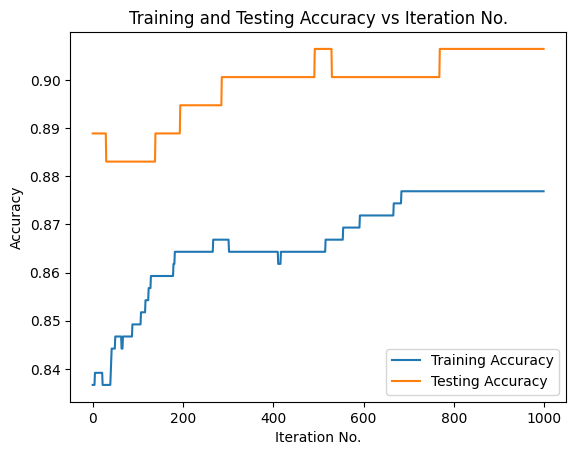

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Step 1: Prepare the Data
data = load_breast_cancer()
X, y = data.data, data.target
data_scaled = scaler.fit_transform(X)
X=data_scaled
# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# Step 2: Define the Logistic Regression Model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.training_accuracy = []
        self.testing_accuracy = []

        for epoch in range(self.epochs):
            z = np.dot(X, self.theta)
            y_pred = self.sigmoid(z)
            cost = self.cost_function(y, y_pred)

            # Gradient Descent
            gradient = np.dot(X.T, (y_pred - y)) / len(y)
            self.theta -= self.learning_rate * gradient

            # Evaluate accuracy
            training_accuracy = self.evaluate(X_train, y_train)
            testing_accuracy = self.evaluate(X_test, y_test)
            self.training_accuracy.append(training_accuracy)
            self.testing_accuracy.append(testing_accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Cost = {cost}, Training Accuracy = {training_accuracy}, Testing Accuracy = {testing_accuracy}")

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Step 3: Train the Model
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Confusion Matrix
conf_matrix_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
conf_matrix_test = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])

# Sensitivity and Specificity
def sensitivity_specificity(conf_matrix):
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TP = conf_matrix[1][1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

sensitivity_train, specificity_train = sensitivity_specificity(conf_matrix_train)
sensitivity_test, specificity_test = sensitivity_specificity(conf_matrix_test)

print("Training Confusion Matrix:")
print(conf_matrix_train)
print(f"Training Sensitivity: {sensitivity_train}, Training Specificity: {specificity_train}")

print("\nTesting Confusion Matrix:")
print(conf_matrix_test)
print(f"Testing Sensitivity: {sensitivity_test}, Testing Specificity: {specificity_test}")

# Step 5: Plot Training and Testing Accuracy
plt.plot(range(len(model.training_accuracy)), model.training_accuracy, label='Training Accuracy')
plt.plot(range(len(model.testing_accuracy)), model.testing_accuracy, label='Testing Accuracy')
plt.xlabel('Iteration No.')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Iteration No.')
plt.legend()
plt.show()


<b>Q9.Using logistic regression to build a model to classify the iris dataset. Divide the dataset into
training and testing in the ratio 80:20 . Print the confusion matrix, sensitivity and specificity.<b/>

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X, y = iris.data, iris.target

# Step 2: Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55,stratify=y)

# Step 3: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Sensitivity: 1.0
Specificity: 1.0


<b>Q10.Create a linear regression model using the gradient descent method. Create a class to
represent the model with the following functions - init, fit and predict. Find the best fit line for the
dataset Also find the MSE and R2 for the testing dataset.
<b/>

In [238]:
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit(self, X, y):
        m, n = X.shape
        self.coefficients = np.zeros(n)

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.coefficients)
            error = y_pred - y
            gradient = np.dot(X.T, error) / m
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.coefficients)

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize and fit the model
model = LinearRegressionGradientDescent()
model.fit(X_train, y_train)

# Make predictions
y_pred_test = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for testing data
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.034839170587359816
R-squared (R2): 0.9477412441189603


<b>Q11. Consider the dataset wine from sklearn. Using PCA reduce the dimensionality of the dataset to
5. Build a classification model using gaussian naive bayes classifier. Find the training accuracy
and test accurac<b/>
y.

In [251]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
df = pd.DataFrame(X,columns=wine.feature_names)
df
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Reduce the dimensionality of the dataset to 5 using PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Build a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Step 5: Train the model
gnb.fit(X_train_pca, y_train)

# Step 6: Make predictions on the training and testing data
y_train_pred = gnb.predict(X_train_pca)
y_test_pred = gnb.predict(X_test_pca)

# Step 7: Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9366197183098591
Test Accuracy: 1.0


<b>Q12.Consider the dataset iris. Apply the PCA method to select the best 2 features. Using these
features plot the scatter graph. Apply k-means clustering algorithm to cluster the transformed
dataset into 3 cluste<b/>rs

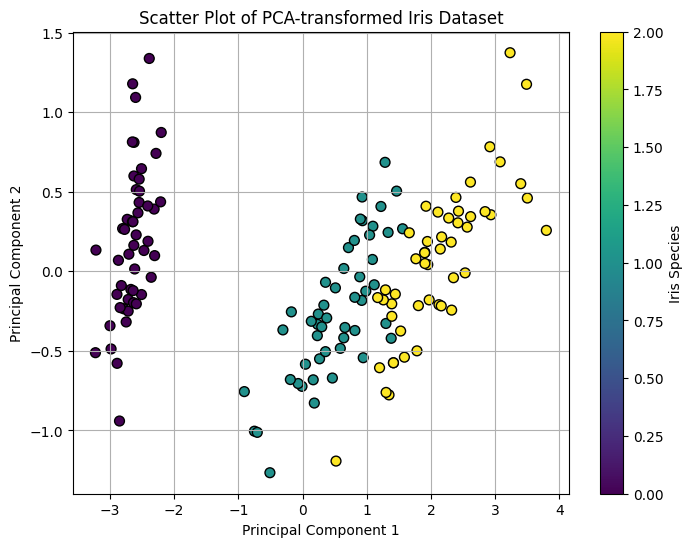

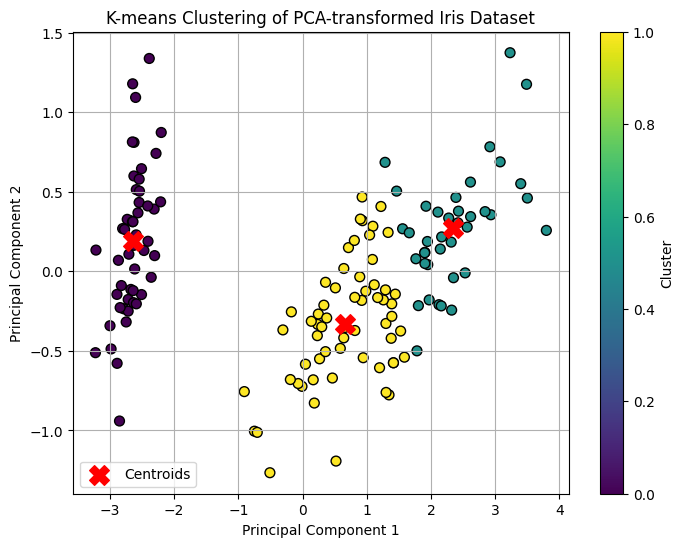

In [253]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA to select the best 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Scatter Plot of PCA-transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Iris Species')
plt.grid(True)
plt.show()

# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=55)
kmeans.fit(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of PCA-transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


<b>Q13.Write a program to implement a single layer perceptron model. Train this for solving a AND
problem with 3 variables.<b/>

In [255]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_fn(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# AND problem inputs and labels
training_inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1])

# Create and train the perceptron model
perceptron = Perceptron(input_size=3)
perceptron.train(training_inputs, labels)

# Test the trained model
test_inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
for inputs in test_inputs:
    prediction = perceptron.predict(inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}")


Inputs: [0 0 0], Prediction: 0
Inputs: [0 0 1], Prediction: 0
Inputs: [0 1 0], Prediction: 0
Inputs: [0 1 1], Prediction: 0
Inputs: [1 0 0], Prediction: 0
Inputs: [1 0 1], Prediction: 0
Inputs: [1 1 0], Prediction: 0
Inputs: [1 1 1], Prediction: 1


In [259]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_fn(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
        return self.weights

# AND problem inputs and labels
training_inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1])

# Create and train the perceptron model
perceptron = Perceptron(input_size=3)
trained_weights = perceptron.train(training_inputs, labels)
print("Trained Weights:", trained_weights)


Trained Weights: [-0.04  0.02  0.01  0.01]


<b>Q14.Consider the dataset iris. Apply hierarchical clustering algorithm to cluster the dataset into 3
clusters.<b/>

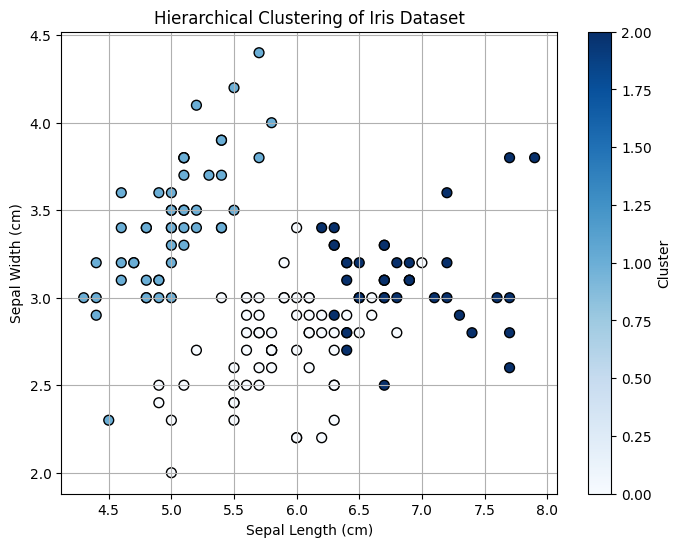

Silhouette Score: 0.5543236611296419


In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply hierarchical clustering algorithm
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='Blues', edgecolor='k', s=50)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


<b>Q15.Write a program to implement 2-layered ANN for classifying digits datasets from sklearn. Use
70% data for training the model and check the accuracy of the model on remaining 30% data.
Use softmax activation function in the last layer and relu function in the hidden layer<b/>

In [263]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=100):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.epochs = epochs

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        delta3 = self.a2 - y
        delta2 = np.dot(delta3, self.W2.T) * (self.a1 > 0)
        dW2 = np.dot(self.a1.T, delta3) / m
        db2 = np.sum(delta3, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, delta2) / m
        db1 = np.sum(delta2, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train):
        for epoch in range(self.epochs):
            # Forward propagation
            y_pred = self.forward(X_train)

            # Backward propagation
            dW1, db1, dW2, db2 = self.backward(X_train, y_train)

            # Update weights
            self.update_weights(dW1, db1, dW2, db2)

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Normalize data
X /= 255.0

# One-hot encode labels
encoder = OneHotEncoder(categories='auto')
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create and train ANN model
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10  # Number of classes
ann = ANN(input_size, hidden_size, output_size)
ann.train(X_train, y_train)

# Evaluate accuracy on test data
y_pred = ann.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.26296296296296295


In [264]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667
